## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')

df_data = df_iris.drop('Species', axis = 1)

df_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


## Dataset에 대한 정보 및 대략적인 분포 확인

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [4]:
df_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

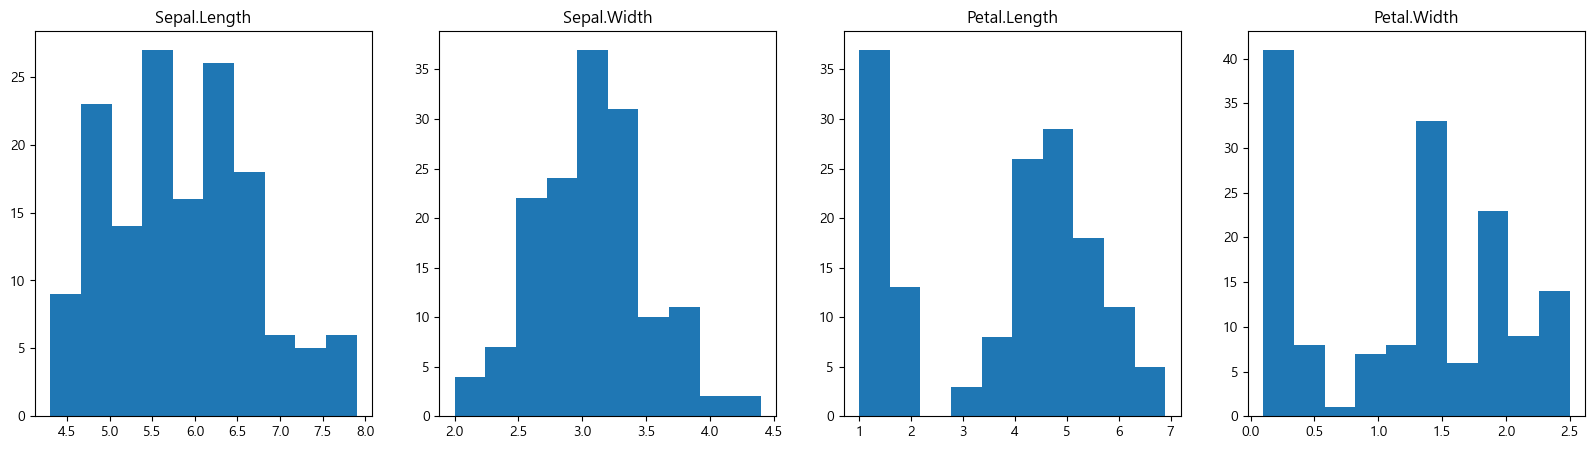

In [5]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(figsize=(20,5), nrows=1, ncols=4)

ax1.set_title('Sepal.Length')
ax1.hist(df_data['Sepal.Length'])

ax2.set_title('Sepal.Width')
ax2.hist(df_data['Sepal.Width'])

ax3.set_title('Petal.Length')
ax3.hist(df_data['Petal.Length'])

ax4.set_title('Petal.Width')
ax4.hist(df_data['Petal.Width'])

In [6]:
# sb.pairplot( df_iris, hue = 'Species')

# 모델 학습에 사용할 x값(예측변수) 설정

In [7]:
x = df_data.iloc[:, 0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


# GMM
- `sklearn.mixture.GaussianMixture()`  https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

- Attributes : `weights_`, `means_`, `covariances_`, `precisions_`, `n_iter_`, `lower_bound_`
- Methods : `.fit()`
- Methods : `.fit_predict()`, `.predict()` : label을 출력

In [8]:
model_gmm = GaussianMixture( n_components=3,
                             random_state=0 )

gmm_labels = model_gmm.fit_predict(x)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
df_result = df_iris.copy()


# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
df_result['gmm_cluster'] = gmm_labels

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
df_result.groupby( ['gmm_cluster'] ).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
gmm_cluster,,,,,
0,50,50,50,50,50
1,55,55,55,55,55
2,45,45,45,45,45


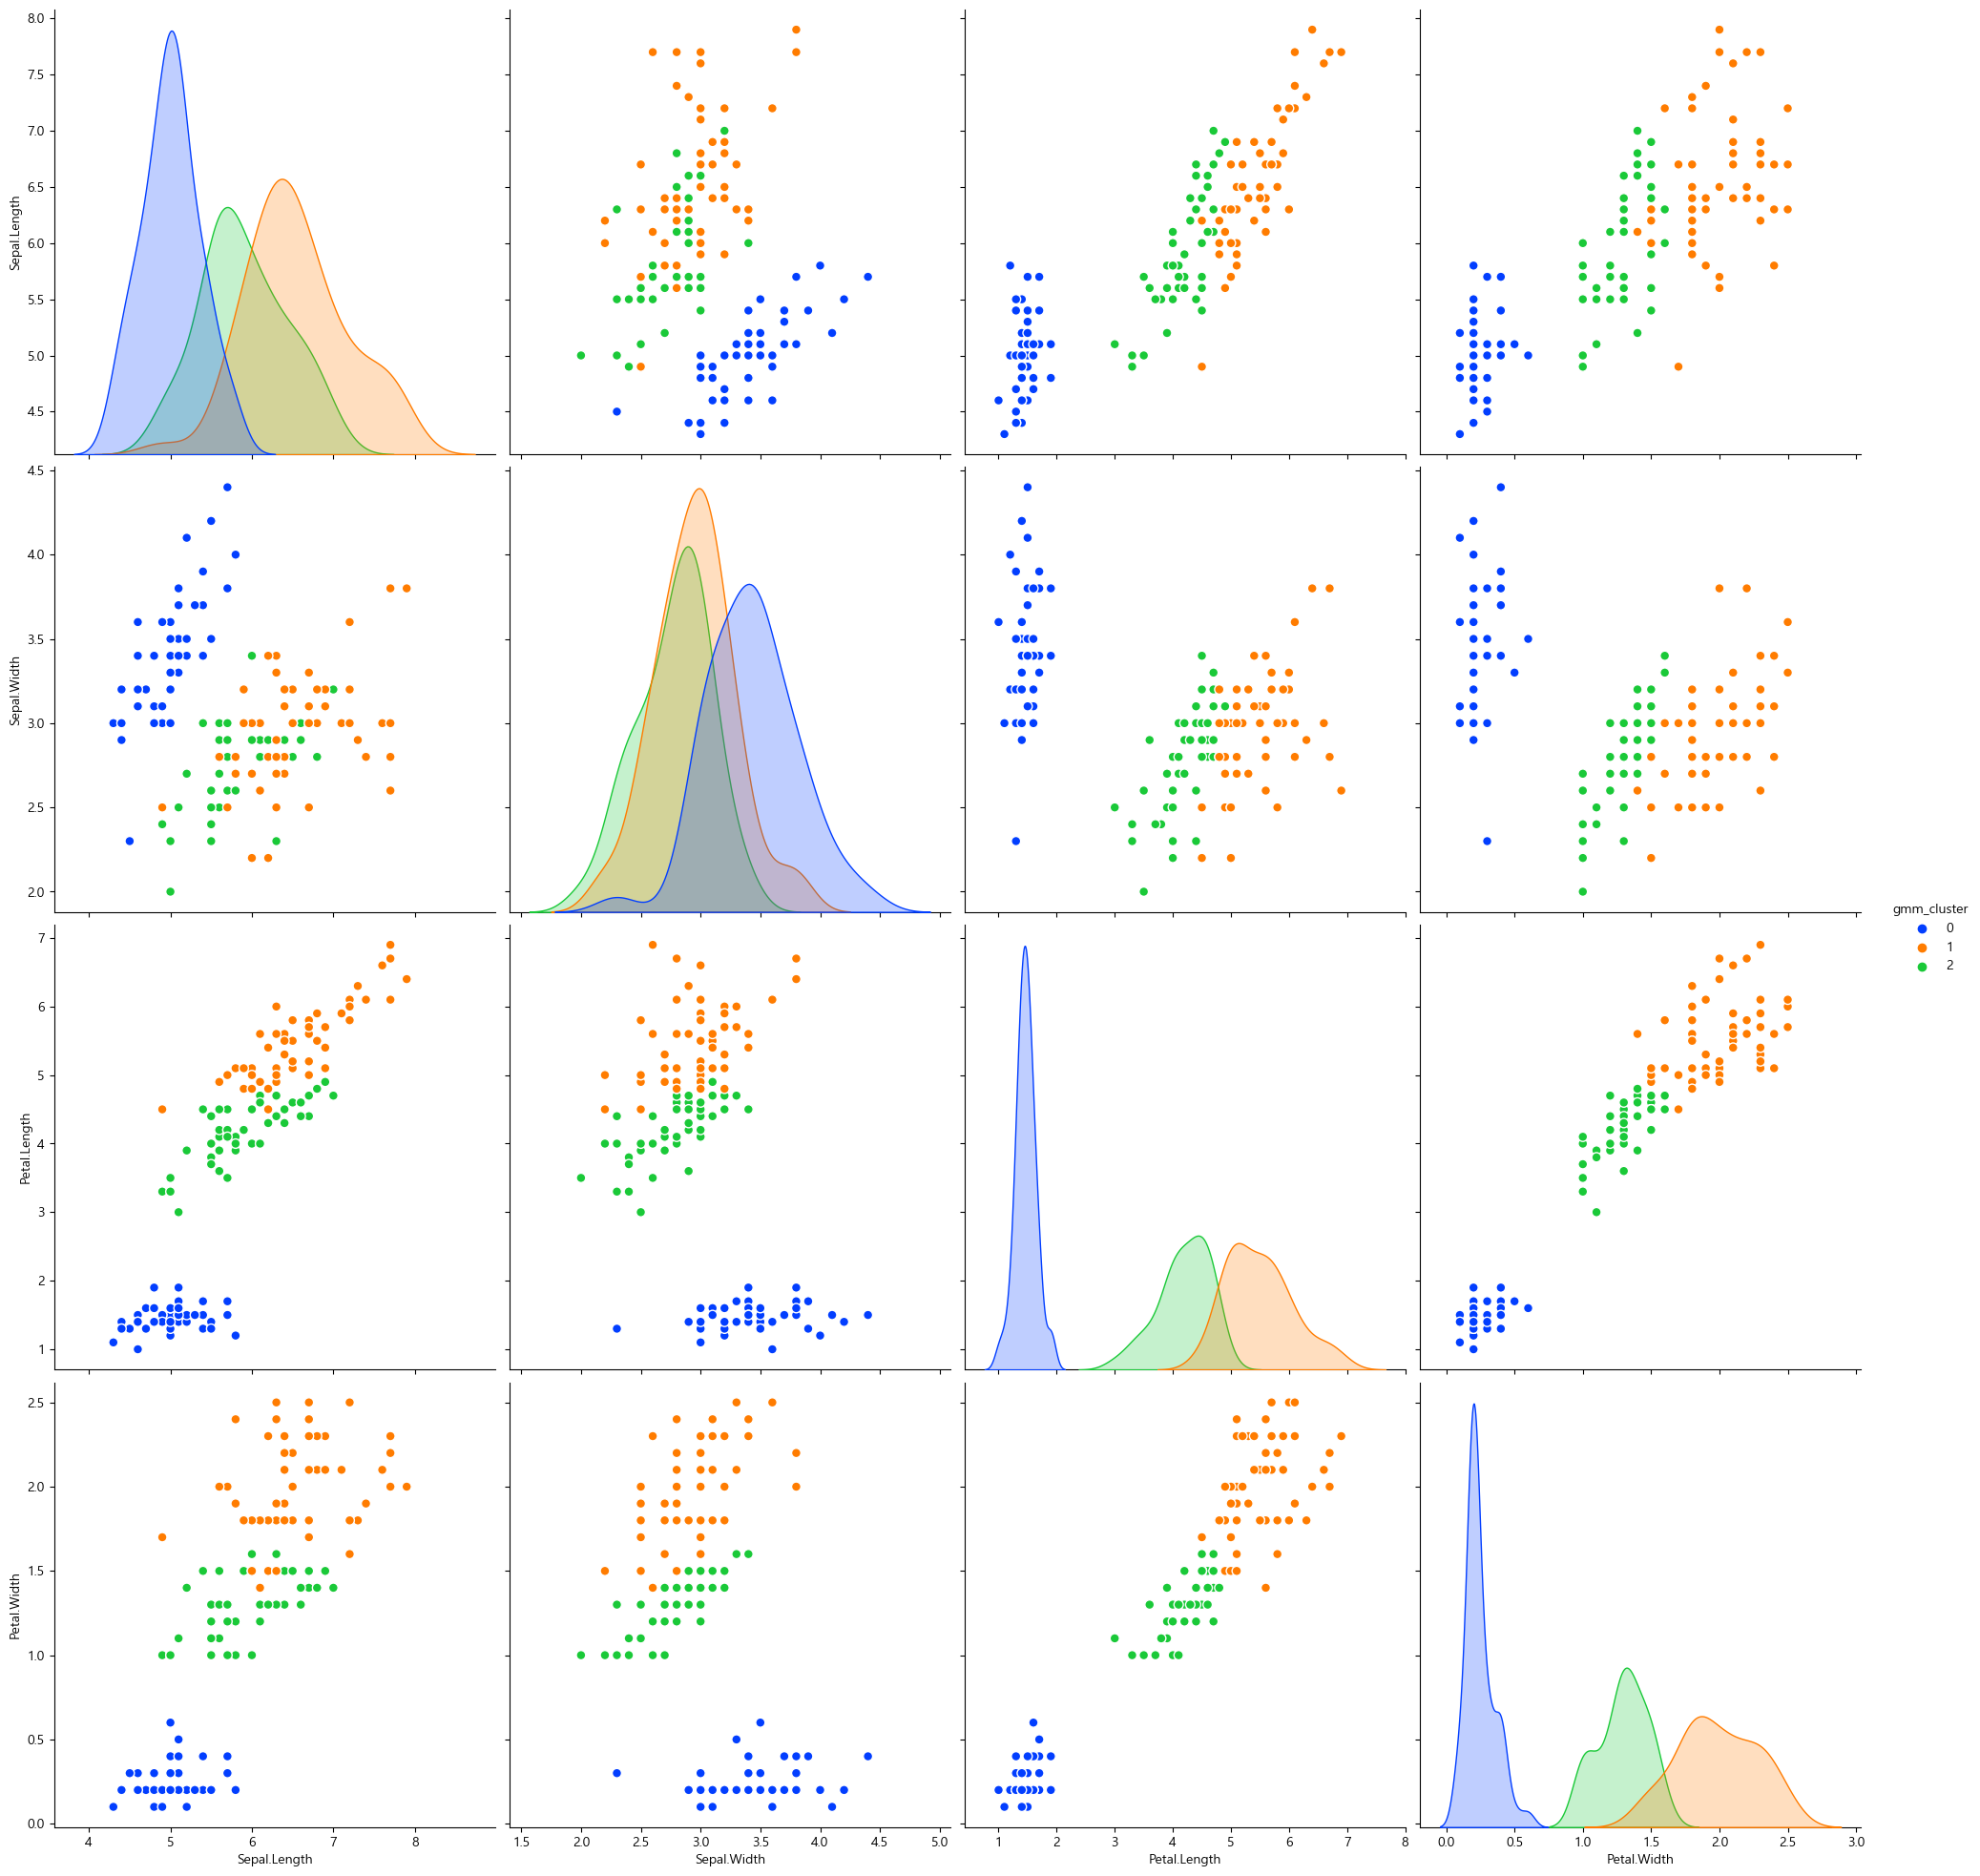

In [10]:
sb.pairplot( df_result,
             hue="gmm_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

# 내부 평가 ( Silhouette Coefficient )
- 개별 데이터 각각의 실루엣 계수: `sklearn.metrics.silhouette_samples()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

- 전체 데이터의 평균 실루엣 계수: `sklearn.metrics.silhouette_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## 개별 데이터 각각의 실루엣 계수 산출

In [11]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, gmm_labels )

print('< 개별 데이터 각각의 실루엣 계수 >\n', score_samples)
print()

< 개별 데이터 각각의 실루엣 계수 >
 [ 0.84285194  0.80269246  0.8182402   0.79192183  0.83920013  0.73020034
  0.81018024  0.84362689  0.73648021  0.81296309  0.78921078  0.82445424
  0.79768671  0.73145756  0.6837594   0.62164496  0.76107161  0.84075559
  0.68508553  0.80815001  0.76742323  0.81393059  0.7810102   0.77830948
  0.75816421  0.78367461  0.82137463  0.83075433  0.83266454  0.80513876
  0.80196023  0.78413963  0.74746134  0.70467177  0.81662118  0.82115044
  0.77991359  0.83147352  0.75427875  0.83966181  0.83942978  0.61673649
  0.77350446  0.78595662  0.7281553   0.79675193  0.80051999  0.8072159
  0.80550833  0.84186253  0.01674681  0.30228879 -0.1205858   0.56300804
  0.24508133  0.5131828   0.14503688  0.33922902  0.27240354  0.54987711
  0.42873693  0.54119058  0.53206661  0.33369945  0.58182881  0.28796384
  0.45266782  0.60948704 -0.34379277  0.61183248 -0.11249647  0.58166157
 -0.09095544  0.38187983  0.46304409  0.33724201  0.03397293  0.21552544
  0.44168648  0.58143465  0.5

In [12]:
# df_result에 각 행에 대한 실루엣 계수 컬럼 추가
df_result['silhouette_coeff'] = score_samples
df_result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,gmm_cluster,silhouette_coeff
1,5.1,3.5,1.4,0.2,setosa,0,0.842852
2,4.9,3.0,1.4,0.2,setosa,0,0.802692
3,4.7,3.2,1.3,0.2,setosa,0,0.818240
4,4.6,3.1,1.5,0.2,setosa,0,0.791922
5,5.0,3.6,1.4,0.2,setosa,0,0.839200
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,1,0.447026
147,6.3,2.5,5.0,1.9,virginica,1,0.180213
148,6.5,3.0,5.2,2.0,virginica,1,0.410094
149,6.2,3.4,5.4,2.3,virginica,1,0.413837


In [13]:
# 군집별 평균 실루엣 계수
group_silhouette = df_result.groupby('gmm_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette)

< 군집별 평균 실루엣 계수 >
 gmm_cluster
0    0.784421
1    0.302522
2    0.429259
Name: silhouette_coeff, dtype: float64


## 평균 실루엣 계수 산출

In [14]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, gmm_labels )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )
print()

전체 평균 실루엣 계수: 0.5012



## 군집수에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score by k >

k = 2 :  0.6867350732769779
k = 3 :  0.5011761635067211
k = 4 :  0.405342051812403
k = 5 :  0.4552544677659271
k = 6 :  0.2710068446534446



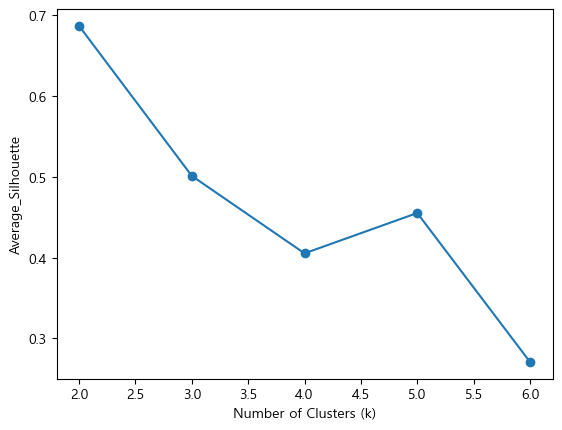

In [15]:
def silhouette_avg_k(a,b):
    avg_silhouette = list()
    print('< Average_Silhouette_Score by k >')
    print()
    
    i = 0
    for i in range(a,b):
        model_gmm = GaussianMixture( n_components = i,
                                     random_state = 0 )
        gmm_labels = model_gmm.fit_predict(x)
        
        average_score = silhouette_score( x, gmm_labels )
        print( 'k =',i,': ', average_score )
        
        avg_silhouette.append(average_score)
    
    print()
    plt.plot(range(a,b), avg_silhouette, '-o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average_Silhouette')
    plt.show()

    
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,7)

In [16]:
def silhouette_avg_vs_group(a,b):
    print('< Average_Silhouette_Score >')
    print()
    
    i = 0
    for i in range(a,b):
        model_gmm = GaussianMixture( n_components = i,
                                     random_state = 0 )
        gmm_labels = model_gmm.fit_predict(x)
        
        score_samples = silhouette_samples( x, gmm_labels )
        average_score = silhouette_score( x, gmm_labels )
        
        df = pd.DataFrame( { 'group' : gmm_labels,
                             'Coeff' : score_samples,
                             'Avg' : average_score } )
        df['Coeff-avg'] = df['Coeff'] - df['Avg']
        
        display( df.groupby(['Avg','group'])[ ['Coeff','Coeff-avg'] ].mean() )
        

# 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,7)

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg      group                     
0.686735 0      0.828733   0.141997
         1      0.615736  -0.070999

Coeff  Coeff-avg
Avg      group                     
0.501176 0      0.784421   0.283245
         1      0.302522  -0.198654
         2      0.429259  -0.071917

Coeff  Coeff-avg
Avg      group                     
0.405342 0      0.782972   0.377630
         1      0.237739  -0.167603
         2      0.345371  -0.059971
         3     -0.083660  -0.489002

Coeff  Coeff-avg
Avg      group                     
0.455254 0      0.771495   0.316240
         1      0.284377  -0.170878
         2      0.299825  -0.155430
         3      0.396585  -0.058669
         4      0.271107  -0.184148

Coeff  Coeff-avg
Avg      group                     
0.271007 0      0.249450  -0.021557
         1      0.278738   0.007731
         2      0.291322   0.020315
         3      0.396585   0.125578
         4      0.273585   0.002578
         5      0.171114  -0.099893

## 클러스터별 평균 실루엣 계수의 시각화

In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette_kmeans(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_component in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = GaussianMixture(n_components = n_component, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_component)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_component + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_component):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_component)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [18]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_multi_PCA(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_component in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = GaussianMixture(n_components = n_component, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(cluster_labels)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_component))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

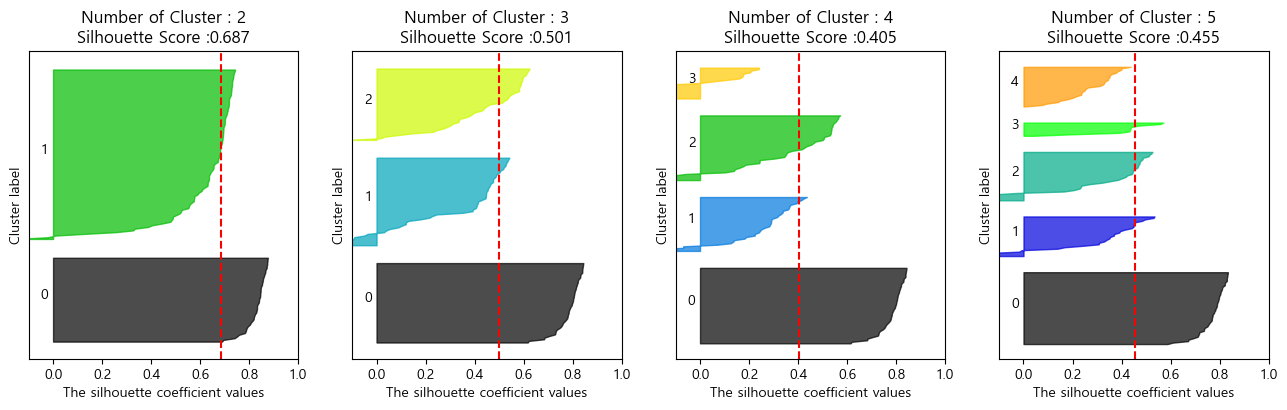

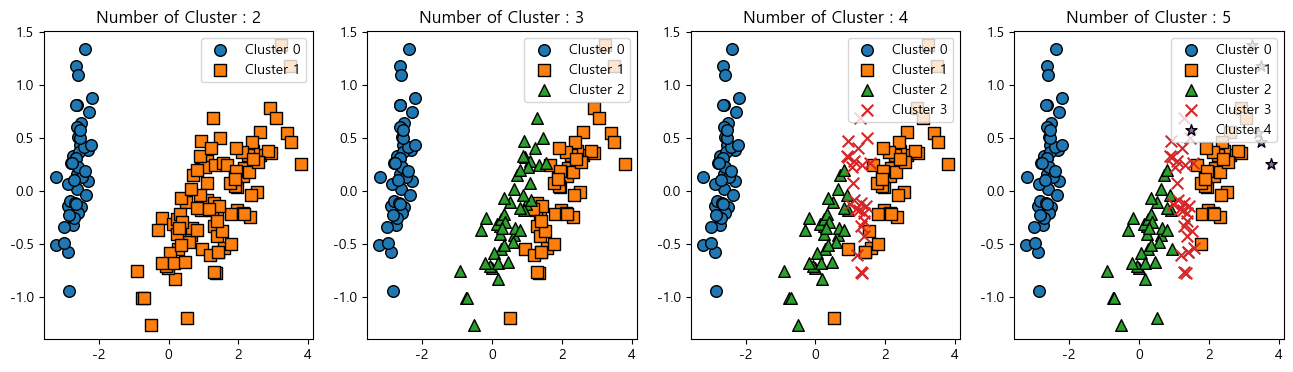

In [19]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette_kmeans( list(range(2,6)), x)
visualize_kmeans_multi_PCA( list(range(2,6)), x)

In [20]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [21]:
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
x = df_iris.iloc[:,2:4]
df_cluster = pd.DataFrame( data = x.values, columns=['ftr1', 'ftr2'] )

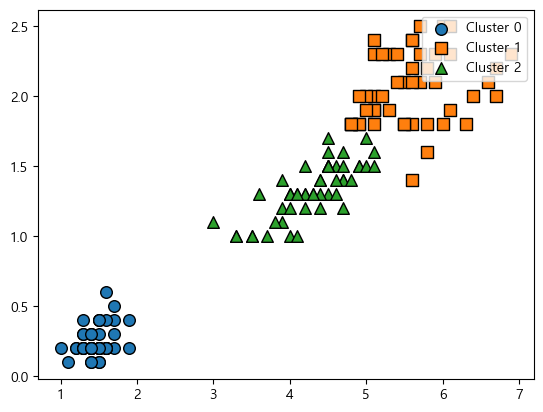

In [24]:
gmm = GaussianMixture(n_components=3, random_state=0)

gmm_label = gmm.fit_predict(x)

df_cluster['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot( gmm, df_cluster, 'gmm_label', iscenter=False)

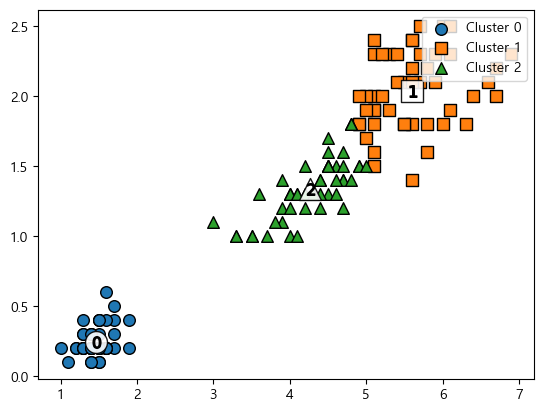

In [25]:
kmeans = KMeans(3, random_state=0)

kmeans_label = kmeans.fit_predict(x)

df_cluster['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, df_cluster, 'kmeans_label', iscenter=True)